In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('NIFTY BANK_Historical_PR_01072023to01072024.csv')

In [3]:
df.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY BANK,01 Jul 2024,52351.15,52656.15,52166.05,52574.75
1,NIFTY BANK,28 Jun 2024,52874.95,53030.30,52242.30,52342.25
2,NIFTY BANK,27 Jun 2024,52980.30,53180.75,52639.00,52811.30
3,NIFTY BANK,26 Jun 2024,52653.20,52988.30,52373.70,52870.50
4,NIFTY BANK,25 Jun 2024,51759.45,52746.50,51747.65,52606.00


In [4]:
df.tail()

,Index Name,Date,Open,High,Low,Close
243,NIFTY BANK,07 Jul 2023,45118.05,45227.25,44844.80,44925.00
244,NIFTY BANK,06 Jul 2023,45060.55,45417.50,45042.60,45339.90
245,NIFTY BANK,05 Jul 2023,45169.70,45418.90,45073.40,45151.80
246,NIFTY BANK,04 Jul 2023,45310.55,45655.50,45000.25,45301.45
247,NIFTY BANK,03 Jul 2023,44957.95,45353.20,44882.10,45158.10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  248 non-null    object 
 1   Date        248 non-null    object 
 2   Open        248 non-null    float64
 3   High        248 non-null    float64
 4   Low         248 non-null    float64
 5   Close       248 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


# Convert the Date into the Datetime

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.sort_values('Date',inplace=True)

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Index Name,Open,High,Low,Close
Date,,,,,
2023-07-03,NIFTY BANK,44957.95,45353.20,44882.10,45158.10
2023-07-04,NIFTY BANK,45310.55,45655.50,45000.25,45301.45
2023-07-05,NIFTY BANK,45169.70,45418.90,45073.40,45151.80
2023-07-06,NIFTY BANK,45060.55,45417.50,45042.60,45339.90
2023-07-07,NIFTY BANK,45118.05,45227.25,44844.80,44925.00


In [10]:
df.tail()

,Index Name,Open,High,Low,Close
Date,,,,,
2024-06-25,NIFTY BANK,51759.45,52746.50,51747.65,52606.00
2024-06-26,NIFTY BANK,52653.20,52988.30,52373.70,52870.50
2024-06-27,NIFTY BANK,52980.30,53180.75,52639.00,52811.30
2024-06-28,NIFTY BANK,52874.95,53030.30,52242.30,52342.25
2024-07-01,NIFTY BANK,52351.15,52656.15,52166.05,52574.75


In [11]:
df.isnull().sum()

Index Name    0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [12]:
df.shape

(248, 5)

In [13]:
df.describe()

,Open,High,Low,Close
count,248.000000,248.000000,248.000000,248.000000
mean,46414.271976,46673.899798,46117.983669,46401.325000
std,2127.128661,2175.992484,2088.739830,2148.895686
min,42555.600000,42716.200000,42105.400000,42280.150000
25%,44689.200000,44881.575000,44416.650000,44587.362500
50%,46191.450000,46426.975000,45855.650000,46153.900000
75%,47893.125000,48148.350000,47516.762500,47836.887500
max,52980.300000,53180.750000,52639.000000,52870.500000


# Visulization

<AxesSubplot:xlabel='Date'>

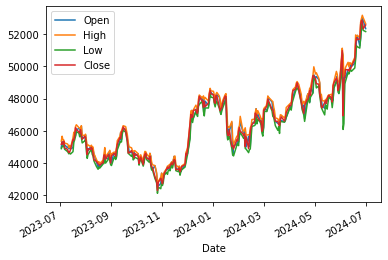

In [14]:
df.plot()

# Plotting Close prices only

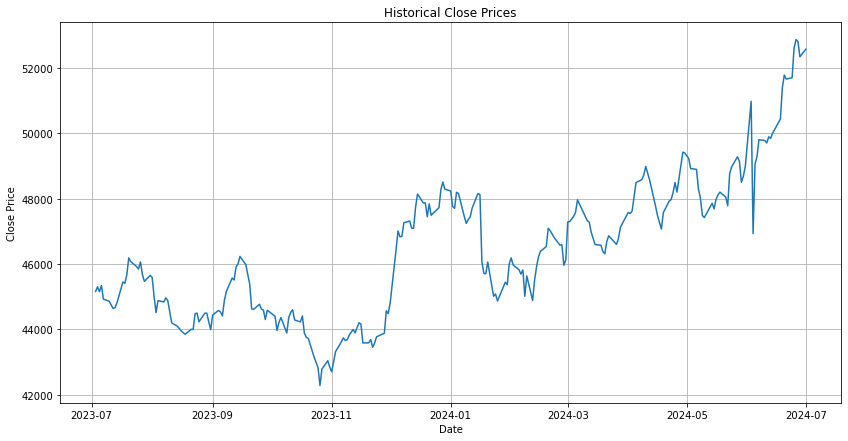

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'])
plt.title('Historical Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Testing for Stationary using Augumented dickey fuller test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
test_result=adfuller(df['Close'])

# H0:It is non Stationary
# H1: It is Stationary

In [18]:
def adfuller_test(close):
    result=adfuller(close)
    labels=["ADF test statictics","p-value","lags used","Number of observation"]
    for value,label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=0.05:
        print('Series is Stationary')
    else: 
        print('Series is Not Stationary')

In [19]:
adfuller_test(df["Close"])

ADF test statictics:-0.19703151301432578
p-value:0.938874529402659
lags used:1
Number of observation:246
Series is Not Stationary


# Differencing to make the series stationary

In [20]:
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
adfuller_test(df['Close_diff'].dropna())

ADF test statictics:-18.88571664884055
p-value:0.0
lags used:0
Number of observation:246
Series is Stationary


<AxesSubplot:xlabel='Date'>

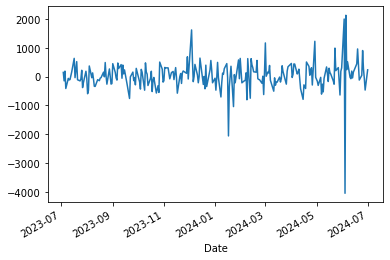

In [21]:
df["Close_diff"].plot()

# Plot ACF and PACF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


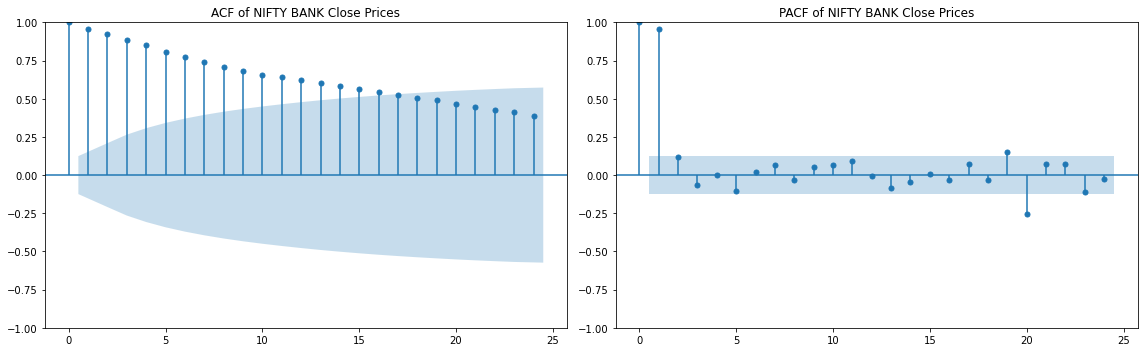

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(df['Close'], ax=axes[0])
axes[0].set_title('ACF of NIFTY BANK Close Prices')

plot_pacf(df['Close'], ax=axes[1])
axes[1].set_title('PACF of NIFTY BANK Close Prices')

plt.tight_layout()
plt.show()

# Time series Decomposition

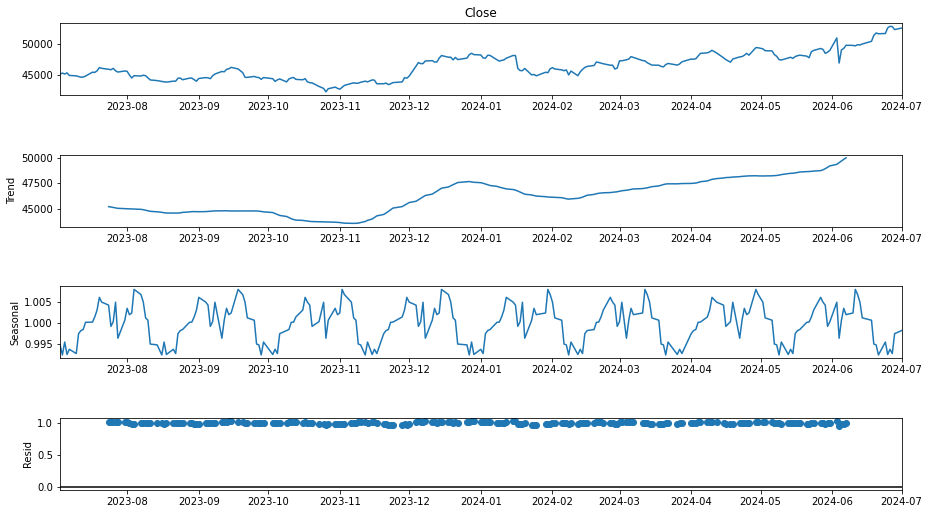

In [23]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

# SARIMA Model

In [24]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df['Close'], 
                            start_p=1, start_q=1,
                            max_p=3, max_q=3, 
                            m=7,  
                            start_P=0, seasonal=True, 
                            d=1, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=3804.528, Time=1.25 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3832.079, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3810.048, Time=0.39 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=3802.847, Time=0.50 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=3833.108, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=3797.349, Time=1.00 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=3810.045, Time=0.34 sec
 ARIMA(0,1,1)(2,1,1)[7]             : AIC=3799.326, Time=1.50 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=3799.323, Time=1.88 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=3798.445, Time=1.40 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=3803.080, Time=0.86 sec
 ARIMA(0,1,1)(2,1,2)[7]             : AIC=inf, Time=3.17 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=3796.754, Time=0.45 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=3802.507, Time=0.35 sec
 ARIMA(0,1,0)(1,1,0)[7]             : 

In [25]:
# Get the best seasonal order
best_seasonal_order = stepwise_model.order
best_seasonal_order_seasonal = stepwise_model.seasonal_order
print(f'Best seasonal order: {best_seasonal_order}')
print(f'Best seasonal order (seasonal): {best_seasonal_order_seasonal}')

Best seasonal order: (0, 1, 0)
Best seasonal order (seasonal): (1, 1, 1, 7)


In [26]:
sarima_model = SARIMAX(df['Close'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit(disp=False)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Forecast

In [27]:
forecast_steps =7 
forecast = sarima_result.forecast(steps=forecast_steps)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Generate dates for the forecast

In [28]:
last_date = df.index[-1]
forecast_dates = [last_date + timedelta(days=i+1) for i in range(forecast_steps)]

# Print and plot forecasts

In [29]:
forecast_steps = 7
start_date = df.index[-1] + pd.Timedelta(days=1)
prediction_dates = []

while len(prediction_dates) < forecast_steps:
    if start_date.weekday() < 5:  
        prediction_dates.append(start_date)
    start_date += pd.Timedelta(days=1)
    

In [30]:
forecast = sarima_result.forecast(steps=forecast_steps)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
prediction_df = pd.DataFrame({'Date': prediction_dates, 'Predicted_Close': forecast})
prediction_df.set_index('Date', inplace=True)


In [32]:
print(prediction_df)

            Predicted_Close
Date                       
2024-07-02     52521.998709
2024-07-03     52740.818364
2024-07-04     53041.951831
2024-07-05     53372.046937
2024-07-08     53371.404535
2024-07-09     53172.409219
2024-07-10     53361.846338


In [33]:
# 353 349 62 712

712

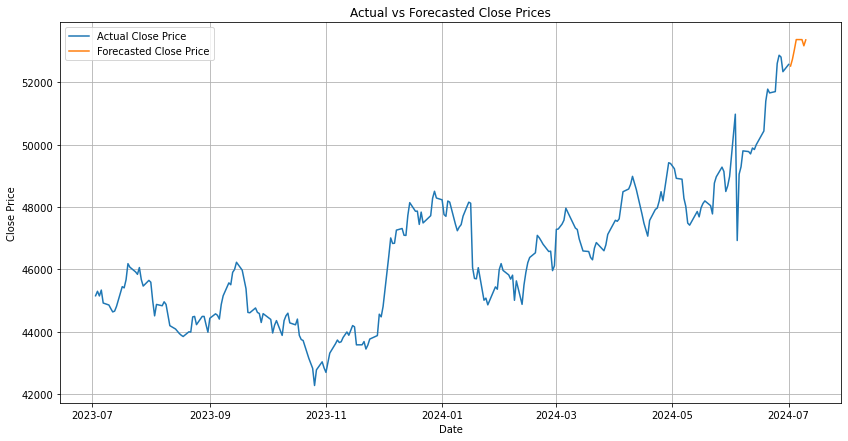

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(prediction_dates, forecast, label='Forecasted Close Price')
plt.title('Actual vs Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate Forecast Accuracy

In [35]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [36]:
sarima_model = SARIMAX(df['Close'], order=(0, 1, 0), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit(disp=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
start = len(train)
end = len(train) + len(test) - 1
predictions = sarima_result.predict(start=start, end=end, typ='levels')

In [38]:
# Evaluate accuracy
from sklearn.metrics import mean_absolute_error
mape = np.mean(np.abs((test['Close'] - predictions) / test['Close'])) * 100

accuracy_results = {'Mean Absolute  percentage Error':mape}

print(accuracy_results)

{'Mean Absolute  percentage Error': 1.2774513499360018}
